# Real estate price prediction using ML 

This project aims to correctly predict real estate prices in Madrid based on a publicly available dataset, after doing some data cleaning and exploration. In particular, the project is meant more as a learning experience for the author, evaluating 4 different ML techniques to make predictions - linear regression using ordinary least squares (OLS), RandomForest Regressor, Catboost Regressor and LightGBM Regressor. Clarifying comments have been made throughout the report and there is also a conclusion at the end. 

**Best result: 91% R-squared score using tuned LGBM** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
#importing data from csv file
raw_data = pd.read_csv('/kaggle/input/madrid-real-estate-market/houses_Madrid.csv')

pd.set_option("display.max_columns", None)
# exploring the top 5 rows of the data
raw_data.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [3]:
raw_data.describe(include='all')

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
count,21742.000000,21742.000000,21742,21742,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,16277,21742,15837,6300,0.0,19135,20572,0.0,21742,21742,2.174200e+04,0.0,21742,2.174200e+04,21742.000000,21742,21351,21742,20750,10000.000000,13608,13608,0.0,11211,13399,19356,18699,1556,5171,9548,3321,7698,0.0,0.0,4074,4057,21742,21742,0.0,0.0,7719,7719.000000,11358,11358,11358,11358
unique,NaN,NaN,10736,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9666,2,6177,420,NaN,19,2,NaN,126,1,NaN,NaN,1,NaN,NaN,1,4,2,2,NaN,2,2,NaN,1,1,2,2,1,1,1,1,1,NaN,NaN,1,1,10,2,NaN,NaN,2,NaN,2,2,2,2
top,NaN,NaN,Piso en venta en El Viso,"Chamartín, Madrid",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paseo de la Castellana,True,Paseo de la Castellana,4,NaN,1,False,NaN,Neighborhood 23: Malasaña-Universidad (5196.25...,sale,NaN,NaN,False,NaN,NaN,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,True,True,True,True,True,True,True,True,True,NaN,NaN,True,True,en trámite,False,NaN,NaN,True,NaN,False,False,True,False
freq,NaN,NaN,193,851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,15002,116,210,NaN,4440,18033,NaN,485,21742,NaN,NaN,21742,NaN,NaN,21742,17705,17747,19281,NaN,9516,9516,NaN,11211,13399,14895,16922,1556,5171,9548,3321,7698,NaN,NaN,4074,4057,10937,14023,NaN,NaN,7115,NaN,8567,7287,5823,6302
mean,10870.500000,10871.500000,NaN,NaN,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.917031e+04,NaN,NaN,6.537356e+05,4020.523871,NaN,NaN,NaN,NaN,1970.046400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2658.000518,NaN,NaN,NaN,NaN
std,6276.519112,6276.519112,NaN,NaN,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.171162e+05,NaN,NaN,7.820821e+05,1908.418774,NaN,NaN,NaN,NaN,69.386705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13360.966258,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.459028e+07,NaN,NaN,3.600000e+04,447.000000,NaN,NaN,NaN,NaN,1723.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,5435.250000,5436.250000,NaN,NaN,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.250000e+02,NaN,NaN,1.980000e+05,2551.000000,NaN,NaN,NaN,NaN,1957.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,10870.500000,10871.500000,NaN,NaN,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.116000e+03,NaN,NaN,3.750000e+05,3720.000000,NaN,NaN,NaN,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,16305.750000,16306.750000,NaN,NaN,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.687000e+03,NaN,NaN,7.636000e+05,5000.000000,NaN,NaN,NaN,NaN,1994.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There is lots of data, some features including 21742 counts of data and
58 columns as outlined above. The features with the highest correlation with buy_price will be explored, as well as features logically would increase a given real estate's price. It makes sense that with the parameters below, the price would increase
e.g. more space (sq_mt_built) would increase the price, a newer house would be more expensive, south orientation is also very valuable, etc.

In [4]:
raw_data.corr()['buy_price'].sort_values(ascending=False)

buy_price                  1.000000
sq_mt_built                0.832039
sq_mt_useful               0.809959
n_bathrooms                0.772218
n_rooms                    0.608893
buy_price_by_area          0.519645
has_parking                0.330515
is_exact_address_hidden    0.166835
Unnamed: 0                 0.165192
n_floors                   0.046492
is_renewal_needed          0.044302
parking_price              0.020581
built_year                 0.008514
sq_mt_allotment           -0.025751
id                        -0.165192
rent_price                -0.468449
latitude                        NaN
longitude                       NaN
portal                          NaN
door                            NaN
rent_price_by_area              NaN
is_rent_price_known             NaN
is_buy_price_known              NaN
are_pets_allowed                NaN
is_furnished                    NaN
is_kitchen_equipped             NaN
has_private_parking             NaN
has_public_parking          

In [5]:
#removing unnecessary data from the model
data = raw_data.filter(['sq_mt_built','n_rooms','n_bathrooms', 'buy_price','buy_price_by_area','built_year',
                        'has_parking','is_orientation_south', 'has_lift','has_central_heating', 'subtitle'])

#checking what's left:
data.head()

,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,has_parking,is_orientation_south,has_lift,has_central_heating,subtitle
0,64.0,2,1.0,85000,1328,1960.0,False,False,False,NaN,"San Cristóbal, Madrid"
1,70.0,3,1.0,129900,1856,NaN,False,NaN,True,NaN,"Los Ángeles, Madrid"
2,94.0,2,2.0,144247,1535,NaN,False,NaN,True,False,"San Andrés, Madrid"
3,64.0,2,1.0,109900,1717,1955.0,False,True,True,NaN,"San Andrés, Madrid"
4,108.0,2,2.0,260000,2407,2003.0,True,True,True,NaN,"Los Rosales, Madrid"


In [6]:
data.describe(include='all')

,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,has_parking,is_orientation_south,has_lift,has_central_heating,subtitle
count,21616.000000,21742.000000,21726.000000,2.174200e+04,21742.000000,10000.000000,21742,11358,19356,13608,21742
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,146
top,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,False,"Chamartín, Madrid"
freq,NaN,NaN,NaN,NaN,NaN,NaN,14023,5823,14895,9516,851
mean,146.920892,3.005749,2.091687,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN
std,134.181865,1.510497,1.406992,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN
min,13.000000,0.000000,1.000000,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN
25%,70.000000,2.000000,1.000000,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN
50%,100.000000,3.000000,2.000000,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN
75%,162.000000,4.000000,2.000000,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN


The built_year feature will be interesting to explore and its count of data points is only 10000, meaning more than half of the data for this feature is unavailable. We will use the fillna function with the average built_year so that we do not lose this valuable data.

In [7]:
#there is a disparity on the count of data points between different parameters
#summing the missing data points
data.isnull().sum()

sq_mt_built               126
n_rooms                     0
n_bathrooms                16
buy_price                   0
buy_price_by_area           0
built_year              11742
has_parking                 0
is_orientation_south    10384
has_lift                 2386
has_central_heating      8134
subtitle                    0
dtype: int64

In [8]:
data.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sq_mt_built                146.920892
n_rooms                      3.005749
n_bathrooms                  2.091687
buy_price               653735.647503
buy_price_by_area         4020.523871
built_year                1970.046400
has_parking                  0.355027
is_orientation_south         0.512678
has_lift                     0.769529
has_central_heating          0.300705
dtype: float64

In [9]:
# Fill missing datapoints with mean
data= data.fillna(data.mean())
data.isnull().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


sq_mt_built             0
n_rooms                 0
n_bathrooms             0
buy_price               0
buy_price_by_area       0
built_year              0
has_parking             0
is_orientation_south    0
has_lift                0
has_central_heating     0
subtitle                0
dtype: int64

We have thus filled missing data points.

# Dealing with outliers

<AxesSubplot:xlabel='buy_price', ylabel='Density'>

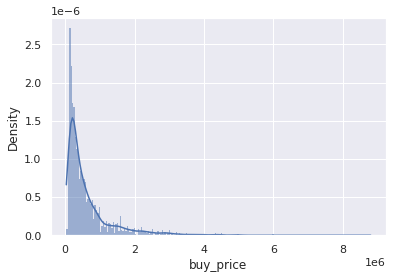

In [10]:
#let's explore the data further to get to know what the price distribution is
#this is valuable since we are trying to train the model to predict buy price
sns.histplot(data['buy_price'],kde=True, stat="density", linewidth=0)

There are some outliers present. Here, the outliers are situated around the higher prices (right side of the graph) and if the right side is excluded, the prices seem normally distributed. Outliers are a great issue for the model we will first use (ordinary least squares OLS).

In [11]:
# Let's declare a variable that will be equal to the 95th percentile of the 'buy_price' variable
q = data['buy_price'].quantile(0.95)

# Then we can create a new dataframe (df), with the condition that all prices must be below 
#the 95th percentile 
data = data[data['buy_price']<q]

data.describe(include='all')


,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,has_parking,is_orientation_south,has_lift,has_central_heating,subtitle
count,20587.000000,20587.000000,20587.000000,2.058700e+04,20587.000000,20587.000000,20587,20587.000000,20587,20587,20587
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,3.000000,3,3,146
top,NaN,NaN,NaN,NaN,NaN,NaN,False,0.512678,True,False,"Chamartín, Madrid"
freq,NaN,NaN,NaN,NaN,NaN,NaN,13718,9901.000000,14316,9151,649
mean,128.659819,2.860640,1.915547,5.118365e+05,3885.937728,1970.007966,NaN,NaN,NaN,NaN,NaN
std,99.115504,1.336969,1.142888,4.432467e+05,1755.412336,48.092061,NaN,NaN,NaN,NaN,NaN
min,13.000000,0.000000,1.000000,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN
25%,70.000000,2.000000,1.000000,1.900000e+05,2500.000000,1970.046400,NaN,NaN,NaN,NaN,NaN
50%,96.000000,3.000000,2.000000,3.500000e+05,3638.000000,1970.046400,NaN,NaN,NaN,NaN,NaN
75%,148.000000,4.000000,2.000000,6.700000e+05,4867.000000,1970.046400,NaN,NaN,NaN,NaN,NaN


We can check the Probability Density Function (PDF) once again to ensure that the result is still distributed in the same way overall. It is, however, there are much fewer outliers:

<AxesSubplot:xlabel='buy_price', ylabel='Density'>

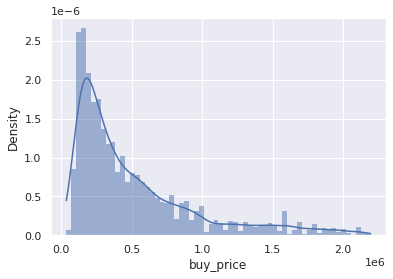

In [12]:
sns.histplot(data['buy_price'],kde=True, stat="density", linewidth=0)

By removing the outliers, the graph is much more concentrated on the real data points now,
it looks more 'normal' as in normally distributed. In general, removing 5% of the dataset should not pose data representativeness issues.

<AxesSubplot:xlabel='built_year', ylabel='Density'>

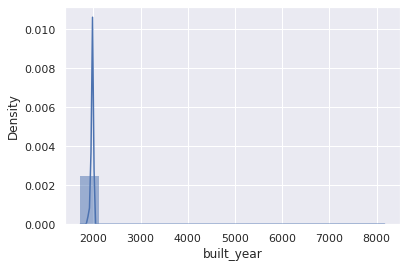

In [13]:
# The year built graph looks strange
sns.histplot(data['built_year'],kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='built_year', ylabel='Density'>

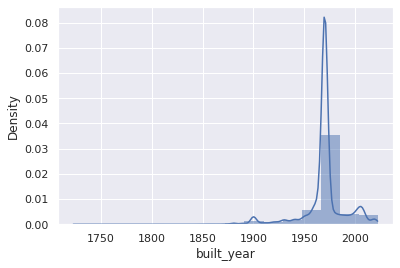

In [14]:
# there is an observation for a built_year in 8170, as can be seen above with the .describe() function.
# let's remove this observation:
data = data[data['built_year'] != 8170]
sns.histplot(data['built_year'],kde=True, stat="density", linewidth=0)

In [15]:
# resetting the index since some observations were dropped. 
data = data.reset_index(drop=True)

In [16]:
data.describe(include='all')

,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,has_parking,is_orientation_south,has_lift,has_central_heating,subtitle
count,20586.000000,20586.000000,20586.000000,2.058600e+04,20586.000000,20586.000000,20586,20586.000000,20586,20586,20586
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,3.000000,3,3,146
top,NaN,NaN,NaN,NaN,NaN,NaN,False,0.512678,True,False,"Chamartín, Madrid"
freq,NaN,NaN,NaN,NaN,NaN,NaN,13717,9900.000000,14315,9151,649
mean,128.661696,2.860633,1.915592,5.118252e+05,3885.724376,1969.706791,NaN,NaN,NaN,NaN,NaN
std,99.117545,1.337001,1.142898,4.432545e+05,1755.188029,21.106719,NaN,NaN,NaN,NaN,NaN
min,13.000000,0.000000,1.000000,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN
25%,70.000000,2.000000,1.000000,1.900000e+05,2500.000000,1970.046400,NaN,NaN,NaN,NaN,NaN
50%,96.000000,3.000000,2.000000,3.500000e+05,3638.000000,1970.046400,NaN,NaN,NaN,NaN,NaN
75%,148.000000,4.000000,2.000000,6.700000e+05,4866.750000,1970.046400,NaN,NaN,NaN,NaN,NaN


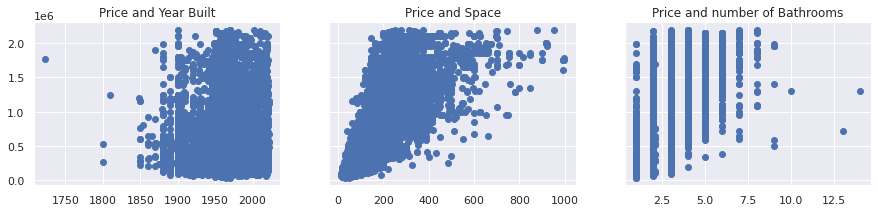

In [17]:
#plotting some parameters together

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['built_year'],data['buy_price'])
ax1.set_title('Price and Year Built')
ax2.scatter(data['sq_mt_built'],data['buy_price'])
ax2.set_title('Price and Space')
ax3.scatter(data['n_bathrooms'],data['buy_price'])
ax3.set_title('Price and number of Bathrooms')


plt.show()

In [18]:
# log transforming price
log_price = np.log(data['buy_price'])

# Then we add it to our data frame
data['log_price'] = log_price
data.head()

,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,has_parking,is_orientation_south,has_lift,has_central_heating,subtitle,log_price
0,64.0,2,1.0,85000,1328,1960.0000,False,False,False,0.300705,"San Cristóbal, Madrid",11.350407
1,70.0,3,1.0,129900,1856,1970.0464,False,0.512678,True,0.300705,"Los Ángeles, Madrid",11.774520
2,94.0,2,2.0,144247,1535,1970.0464,False,0.512678,True,False,"San Andrés, Madrid",11.879282
3,64.0,2,1.0,109900,1717,1955.0000,False,True,True,0.300705,"San Andrés, Madrid",11.607326
4,108.0,2,2.0,260000,2407,2003.0000,True,True,True,0.300705,"Los Rosales, Madrid",12.468437


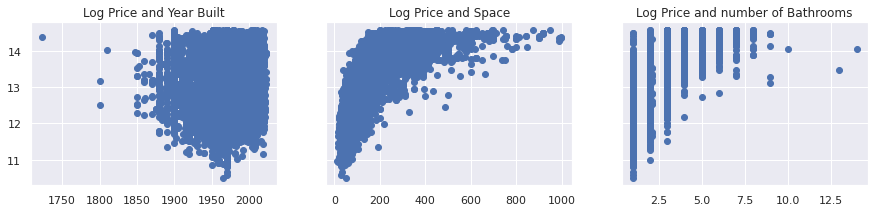

In [19]:
#log plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['built_year'],data['log_price'])
ax1.set_title('Log Price and Year Built')
ax2.scatter(data['sq_mt_built'],data['log_price'])
ax2.set_title('Log Price and Space')
ax3.scatter(data['n_bathrooms'],data['log_price'])
ax3.set_title('Log Price and number of Bathrooms')


plt.show()

In [20]:
# dropping the old buy price
data = data.drop(['buy_price'],axis=1)

It seems that the year built feature does not have a clear relationship with the buy price.

# Exploring feature correlation and multicollinearity

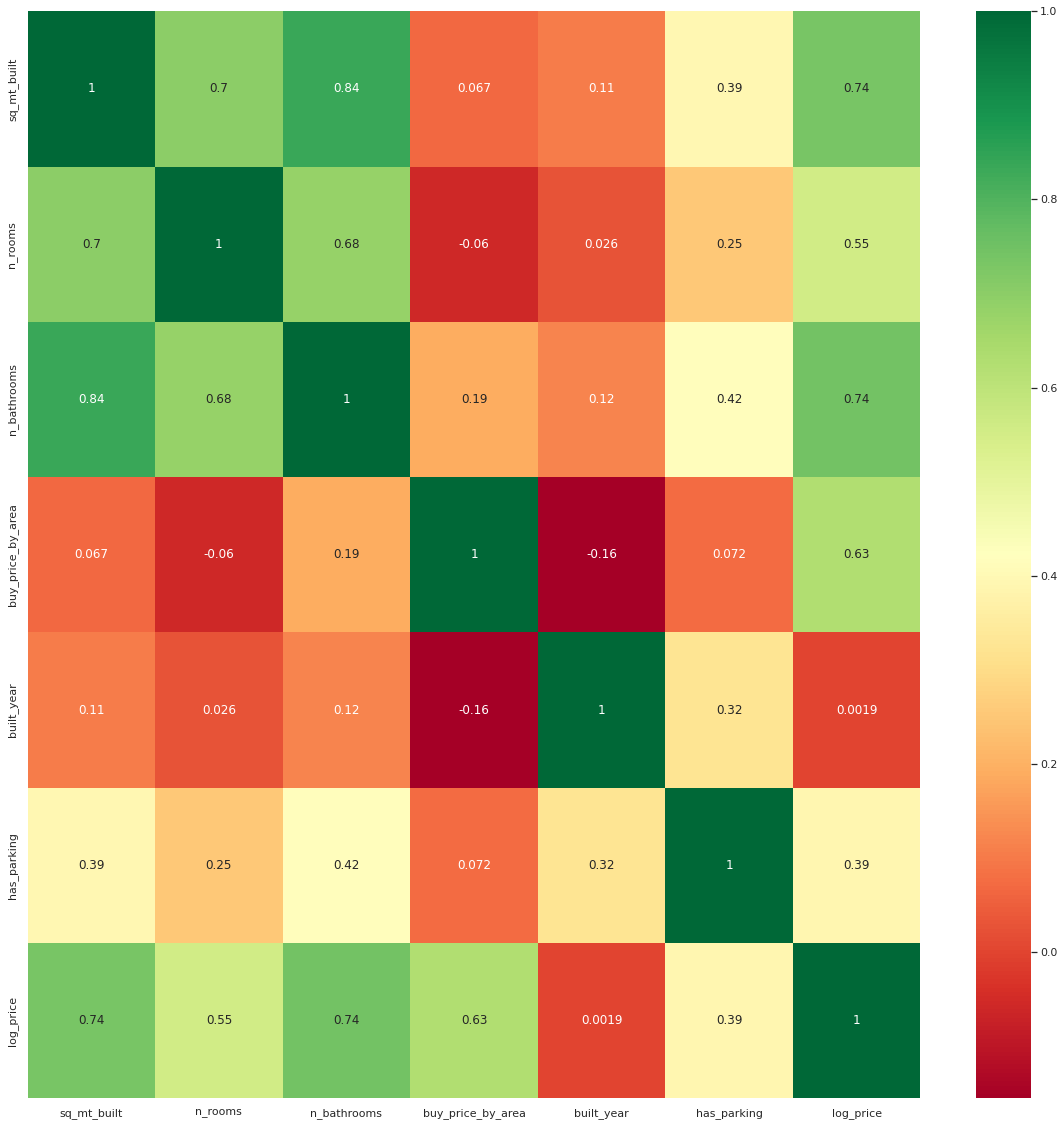

In [21]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Now it's much more clear what the correlation is between all the datasets. For the green, we have high correlation and for the red, we have little to no correlation between the parameters in the dataset. Most of the parameters have at least some correlation with log price, which is a good indicator that the logic applied at the beginning has some merit.

In [22]:
# statsmodels will be used for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# declaring a variable to put all features to check for multicollinearity, 
# it cannot include categorical data so the features will be typed manually
variables = data[['sq_mt_built', 'n_bathrooms', 'built_year', 'buy_price_by_area', 'n_rooms']]

#create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# include names to make it easier to explore the result
vif["Features"] = variables.columns

vif

,VIF,Features
0,10.101336,sq_mt_built
1,14.854578,n_bathrooms
2,11.391233,built_year
3,6.561685,buy_price_by_area
4,12.194722,n_rooms


Since number of bathrooms and number of rooms have high VIF, one of them will be removed from the model. This will drive the VIF of other variables down. So even if sq_mt_built seems with a high VIF, too, once the n_bathrooms feature is removed that will no longer be the case.

In [23]:
data = data.drop(['n_bathrooms'],axis=1)

#let's check vif again
variables = data[['built_year','sq_mt_built','n_rooms', 'buy_price_by_area']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,11.390730,built_year
1,5.378013,sq_mt_built
2,11.135439,n_rooms
3,6.005671,buy_price_by_area


The VIF score of n_rooms is above the 5 threshold, so it has to be removed as well.

In [24]:
data = data.drop(['n_rooms'],axis=1)

#let's check vif again
variables = data[['built_year','sq_mt_built', 'buy_price_by_area']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,7.194098,built_year
1,2.704413,sq_mt_built
2,5.880915,buy_price_by_area


Seeing as the buy_price_by_area variable is quite similar to the variable to be predicted, it will be dropped.

In [25]:
data = data.drop(['buy_price_by_area'],axis=1)
#let's check vif again
variables = data[['built_year','sq_mt_built']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,2.692488,built_year
1,2.692488,sq_mt_built


 Creating dummies for real estate location feature, to be used in regression

In [26]:
# The location data seems like a logical feature to include in a real estate prediction model
dummies_subtitle = pd.get_dummies(data['subtitle'], drop_first=True)
# drop_first makes sure no multicollinearity will occur between first dummy and others

data = pd.concat([dummies_subtitle, data],axis=1)
#uniting the two datasets

Now, the dataframe includes a column for each subtitle (neighbourhood) of Madrid, with binary outcome (e.g. Is the real estate located in X neighhbourhood? -> outcome yes/no, or 1-0). These parameters can be used in the algorithms for real estate price prediction.

# Technique 1: Linear regression - Ordinary Least Squares

In [27]:
# firstly, let's drop variables with lesser explanatory power
data = data.drop(['is_orientation_south', 'has_lift','has_central_heating'],axis=1)
# as a final step, we ought to remove the 'subtitle' column as it was already converted to dummies
data_preprocessed = data.drop(['subtitle'],axis=1)

In [28]:
# The target (dependent variable) is 'log_price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

The data will be scaled for the OLS to make sure the scale of each feature does not negatively impact the model.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

# storing the scaling inputs in a new variable
inputs_scaled = scaler.transform(inputs)

In [30]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

#let's check the shapes of inputs and targets
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16468, 148) (16468,)
(4118, 148) (4118,)


In [31]:
#the test-train split is 80-20 as evident from above
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled train inputs and targets
reg.fit(x_train,y_train)

# Let's check the outputs of the regression
# y_hat = predictions
y_hat = reg.predict(x_train)

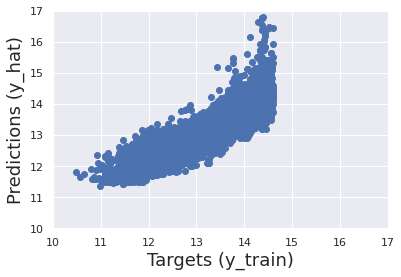

In [32]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)

#naming the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

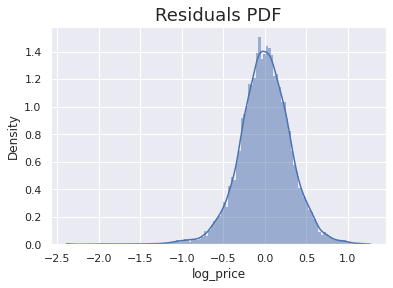

In [33]:
# We can plot the PDF of the residuals and check for anomalies
sns.histplot(y_train - y_hat, kde=True, stat="density", linewidth=0)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed


It seems that the predictions are less accurate at the price outliers, in the lower and upper ranges

In [34]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared

0.8425093329036228

In [35]:
# Obtain the bias (intercept) of the regression
reg.intercept_

12.82125246243013

In [36]:
# Create a regression summary where we can compare the feature weights with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,"Abrantes, Madrid",-0.004661
1,"Acacias, Madrid",0.060996
2,"Adelfas, Madrid",0.049218
3,"Alameda de Osuna, Madrid",0.013464
4,"Almagro, Madrid",0.122993
...,...,...
143,"Zofío, Madrid",-0.004637
144,"Águilas, Madrid",-0.003213
145,sq_mt_built,0.418690
146,built_year,0.029318


**Testing**

In [37]:
# Testing is done on a dataset that the algorithm has never seen
y_hat_test_OLS = reg.predict(x_test)

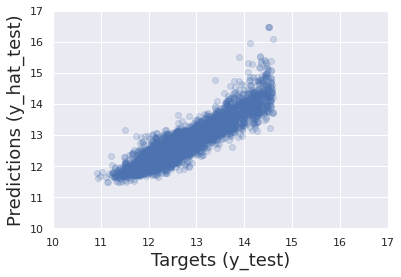

In [38]:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test_OLS, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

There are some predictions outside the 45 degree line, suggesting that the algorithm struggled to correctly predict prices especially in the lower and upper tertiles of price ranges. The algorithm performed much better for predicting the prices in the middle of the range. This is consistent with OLS's inherent limitation in dealing with outliers.

In [39]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test_OLS), columns=['Prediction'])

# drop the old indexing
y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)

# Additionally, we can calculate the difference between the targets and the predictions
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,7.652823e+05,850000.0,84717.738639,9.966793
1,1.770248e+05,99000.0,-78024.848477,78.812978
2,2.136400e+05,199000.0,-14640.010365,7.356789
3,1.437882e+05,130000.0,-13788.225768,10.606328
4,3.948788e+05,395000.0,121.187970,0.030680
...,...,...,...,...
4113,5.583389e+05,414000.0,-144338.919648,34.864473
4114,1.781582e+05,149000.0,-29158.248936,19.569295
4115,8.386713e+05,725000.0,-113671.260048,15.678794
4116,1.509184e+05,159000.0,8081.553446,5.082738


In [40]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4.118000e+03,4.118000e+03,4.118000e+03,4118.000000
mean,5.172369e+05,5.205846e+05,3.347673e+03,25.816590
std,6.471187e+05,4.511602e+05,4.676667e+05,31.417481
min,9.645060e+04,5.500000e+04,-1.216826e+07,0.001561
25%,2.053713e+05,1.940000e+05,-4.932932e+04,8.979438
50%,3.638375e+05,3.590000e+05,1.360977e+03,19.664583
75%,5.994009e+05,6.850000e+05,8.406754e+04,33.517688
max,1.416826e+07,2.190000e+06,1.533088e+06,610.078893


In [41]:
pd.options.display.max_rows = 20
# to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
1790,14130569.96,1990000.00,-12140569.96,610.08
703,14168262.43,2000000.00,-12168262.43,608.41
3715,14168262.43,2000000.00,-12168262.43,608.41
2164,8417518.91,1350000.00,-7067518.91,523.52
3879,510942.16,99000.00,-411942.16,416.10
...,...,...,...,...
1673,130910.16,131000.00,89.84,0.07
2755,600281.44,600000.00,-281.44,0.05
4,394878.81,395000.00,121.19,0.03
2171,1495058.68,1495000.00,-58.68,0.00


In [42]:
#as a final check, import metrics module and check the following metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_OLS, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_OLS, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_OLS, y_test)))

from sklearn.metrics import r2_score
r2_OLS = r2_score (y_hat_test_OLS, y_test)

print ('R-squared score', round (r2_OLS,2))

Mean Absolute Error: 0.2435289857989304
Mean Squared Error: 0.1012714006526415
Root Mean Squared Error: 0.31823167763854293
R-squared score 0.81


# Technique 2: Random forest regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
import time
start = time.time()
rf = RandomForestRegressor()

In [45]:
rf.fit(x_train,y_train)
end = time.time()
diff_rf = end - start
print ('Execution time RF:', round(diff_rf,2),'seconds')

Execution time RF: 22.26 seconds


In [46]:
y_hat_rf = rf.predict(x_train)

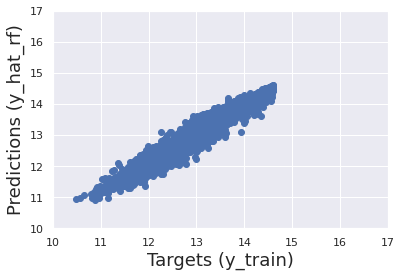

In [47]:
plt.scatter(y_train, y_hat_rf)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_rf)',size=18)


plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

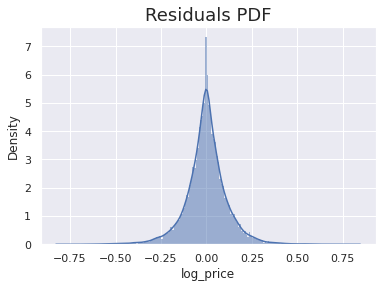

In [48]:
sns.histplot(y_train - y_hat_rf, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [49]:
# Find the R-squared of the model
from sklearn.metrics import r2_score

r2 = r2_score (y_train, y_hat_rf)

print ('R-squared score', round (r2,2))


R-squared score 0.98


Let's try the model on the test values now. It's possible that the model has overfitted, so in order to test its true predictive ability, the model must be given a dataset it has not been trained on.

In [50]:
y_hat_test_rf = rf.predict(x_test)

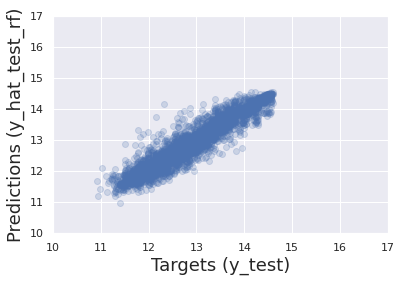

In [51]:
plt.scatter(y_test,y_hat_test_rf, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_rf)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

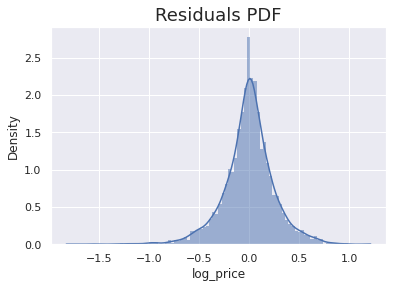

In [52]:
sns.histplot(y_test-y_hat_test_rf, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [53]:
df_pf = pd.DataFrame(np.exp(y_hat_test_rf), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,669887.67,850000.00,180112.33,21.19
1,205539.58,99000.00,-106539.58,107.62
2,189083.14,199000.00,9916.86,4.98
3,126248.81,130000.00,3751.19,2.89
4,364050.91,395000.00,30949.09,7.84
...,...,...,...,...
4113,518394.02,414000.00,-104394.02,25.22
4114,224242.50,149000.00,-75242.50,50.50
4115,915771.09,725000.00,-190771.09,26.31
4116,143455.35,159000.00,15544.65,9.78


In [54]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4118.00,4118.00,4118.00,4118.00
mean,512999.56,520584.60,7585.03,19.39
std,425647.42,451160.18,162135.32,25.34
min,57030.05,55000.00,-1175918.41,0.00
25%,198650.52,194000.00,-38561.65,5.41
50%,350030.81,359000.00,942.72,12.79
75%,697046.87,685000.00,48429.40,25.21
max,2089505.13,2190000.00,1051470.24,522.63


In [55]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
3914,1400918.41,225000.00,-1175918.41,522.63
1139,924584.50,190000.00,-734584.50,386.62
2299,608895.05,130000.00,-478895.05,368.38
3879,387193.23,99000.00,-288193.23,291.10
797,535972.68,145000.00,-390972.68,269.64
...,...,...,...,...
2540,1599000.00,1599000.00,-0.00,0.00
346,540000.00,540000.00,-0.00,0.00
2714,540000.00,540000.00,-0.00,0.00
1188,305000.00,305000.00,-0.00,0.00


In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_rf, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_rf, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_rf, y_test)))

r2_rf = r2_score (y_hat_test_rf, y_test)

print ('R-squared score', round (r2_rf,2))

Mean Absolute Error: 0.18333320549391605
Mean Squared Error: 0.06706482972333436
Root Mean Squared Error: 0.25896878136820733
R-squared score 0.89


# Technique 3: Catboost Regresssor

In [57]:
from catboost import CatBoostRegressor

In [58]:
start = time.time()
cb=CatBoostRegressor()

In [59]:
cb.fit(x_train,y_train, verbose = False)
end = time.time()
diff_cb = end - start
print ('Execution time for CB:', round(diff_cb,2), 'seconds')

Execution time for CB: 4.08 seconds


In [60]:
y_hat_cb = cb.predict(x_train)

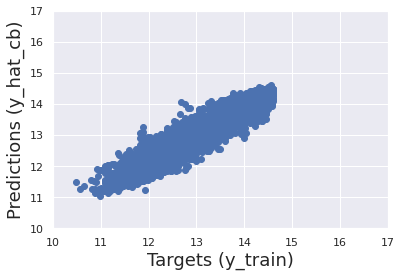

In [61]:
plt.scatter(y_train, y_hat_cb)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_cb)',size=18)


plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

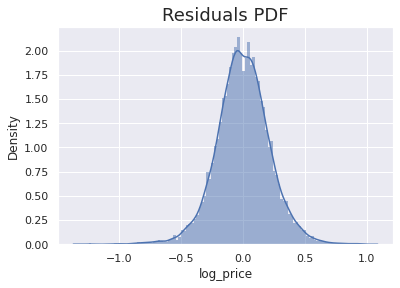

In [62]:
sns.histplot(y_train - y_hat_cb, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)


In [63]:
r2 = r2_score (y_train, y_hat_cb)

print ('R-squared score', round (r2,2))

R-squared score 0.93


let's try the model on the test values now

In [64]:
y_hat_test_cb=cb.predict(x_test)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

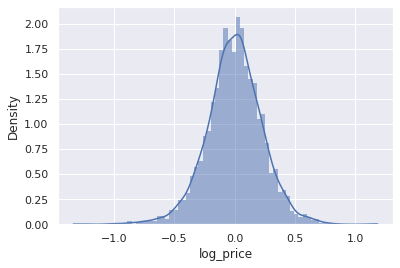

In [65]:
sns.histplot(y_test-y_hat_test_cb, kde=True, stat="density", linewidth=0)

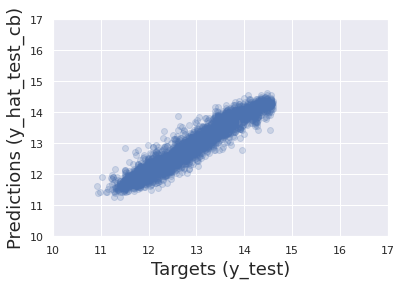

In [66]:
plt.scatter(y_test,y_hat_test_cb, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_cb)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

In [67]:
df_pf = pd.DataFrame(np.exp(y_hat_test_cb), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']


df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,684102.69,850000.00,165897.31,19.52
1,180999.98,99000.00,-81999.98,82.83
2,192253.88,199000.00,6746.12,3.39
3,131520.02,130000.00,-1520.02,1.17
4,314067.27,395000.00,80932.73,20.49
...,...,...,...,...
4113,497042.20,414000.00,-83042.20,20.06
4114,208453.00,149000.00,-59453.00,39.90
4115,1013722.29,725000.00,-288722.29,39.82
4116,170177.51,159000.00,-11177.51,7.03


In [68]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4118.00,4118.00,4118.00,4118.00
mean,502723.29,520584.60,17861.31,18.28
std,403694.87,451160.18,159048.29,18.05
min,77405.42,55000.00,-767463.37,0.02
25%,201774.29,194000.00,-39749.21,6.57
50%,345507.19,359000.00,1442.16,13.93
75%,684128.26,685000.00,56572.74,24.54
max,2184401.63,2190000.00,1411497.37,280.94


In [69]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
3879,377128.97,99000.00,-278128.97,280.94
2628,1044912.78,300000.00,-744912.78,248.30
3914,640955.69,225000.00,-415955.69,184.87
2299,352275.43,130000.00,-222275.43,170.98
191,328973.43,123000.00,-205973.43,167.46
...,...,...,...,...
1338,620319.98,620000.00,-319.98,0.05
1444,319838.32,320000.00,161.68,0.05
998,177072.59,177000.00,-72.59,0.04
472,570129.60,570000.00,-129.60,0.02


In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_cb, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_cb, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_cb, y_test)))

r2_cb = r2_score (y_hat_test_cb, y_test)

print ('R-squared score', round (r2_cb,2))

Mean Absolute Error: 0.1776194502154222
Mean Squared Error: 0.054320890154407324
Root Mean Squared Error: 0.2330684237609362
R-squared score 0.91


# Technique 4: LGBM Regressor

In [71]:
from lightgbm import LGBMRegressor

In [72]:
start = time.time()
lb=LGBMRegressor()  
lb.fit(x_train,y_train)
end = time.time()
diff_lb_def = end - start
print ('Execution time for LGBM:', round(diff_lb_def,2), 'seconds')

Execution time for LGBM: 0.43 seconds


In [73]:
y_hat_lb_def = lb.predict(x_train)

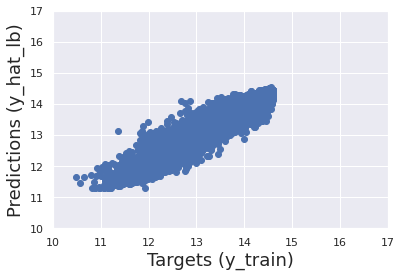

In [74]:
plt.scatter(y_train, y_hat_lb_def)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_lb)',size=18)


plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

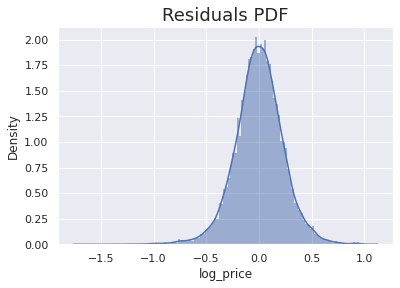

In [75]:
sns.histplot(y_train - y_hat_lb_def, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [76]:
r2 = r2_score (y_train, y_hat_lb_def)

print ('R-squared score', round (r2,2))

R-squared score 0.92


In [77]:
y_hat_test_lb_def=lb.predict(x_test)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

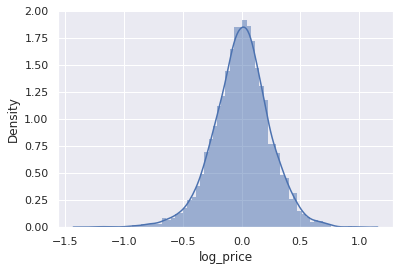

In [78]:
sns.histplot(y_test-y_hat_test_lb_def, kde=True, stat="density", linewidth=0)

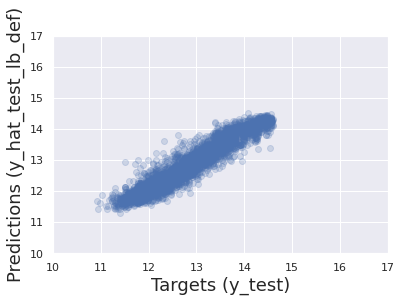

In [79]:
plt.scatter(y_test,y_hat_test_lb_def, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_lb_def)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

In [80]:
df_pf = pd.DataFrame(np.exp(y_hat_test_lb_def), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,651462.57,850000.00,198537.43,23.36
1,187125.19,99000.00,-88125.19,89.02
2,203981.83,199000.00,-4981.83,2.50
3,129729.78,130000.00,270.22,0.21
4,334638.57,395000.00,60361.43,15.28
...,...,...,...,...
4113,521018.00,414000.00,-107018.00,25.85
4114,210907.82,149000.00,-61907.82,41.55
4115,1003274.51,725000.00,-278274.51,38.38
4116,162154.33,159000.00,-3154.33,1.98


In [81]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4118.00,4118.00,4118.00,4118.00
mean,501811.67,520584.60,18772.93,19.21
std,400218.47,451160.18,163698.16,19.90
min,81058.52,55000.00,-839214.23,0.00
25%,200149.72,194000.00,-39685.57,6.66
50%,349624.77,359000.00,1812.34,14.39
75%,674798.58,685000.00,60190.78,25.84
max,1996549.16,2190000.00,1427091.25,319.19


In [82]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
3879,414994.07,99000.00,-315994.07,319.19
3914,824660.09,225000.00,-599660.09,266.52
2299,435157.42,130000.00,-305157.42,234.74
2628,985176.36,300000.00,-685176.36,228.39
191,386879.18,123000.00,-263879.18,214.54
...,...,...,...,...
717,619903.79,620000.00,96.21,0.02
2606,160011.95,160000.00,-11.95,0.01
280,234983.99,235000.00,16.01,0.01
393,1179964.16,1180000.00,35.84,0.00


In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_lb_def, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_lb_def, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_lb_def, y_test)))

r2_lb_def = r2_score (y_hat_test_lb_def, y_test)

print ('R-squared score', round (r2_lb_def,3))

Mean Absolute Error: 0.18554628404109294
Mean Squared Error: 0.05993169412091412
Root Mean Squared Error: 0.2448095057813608
R-squared score 0.896


# Technique 5: Hyperparameter-tuned LGBM Regressor

In [84]:
start = time.time()
lb=LGBMRegressor()  

In [85]:
# hyperparameter tuning will only be performed on LGBM because it is a very quick algorithm
# and the iterations will not significantly slow down running the entire script
from sklearn.model_selection import RandomizedSearchCV

# these parameters would change depending on dataset size
params = {
    "learning_rate": (0.01, 0.03, 0.1, 0.3, 0.5), # default 0.1 
    "max_depth": (1, 2, 3, 4, 5, 6), # default 3
    "n_estimators": (50, 100, 150, 200), # default 100
    "subsample": (0.1, 0.3, 0.5, 1)
}

lb = RandomizedSearchCV(estimator = lb, param_distributions = params,
                        scoring='neg_mean_squared_error', n_iter = 50, cv = 5, 
                        verbose=False, random_state=42, n_jobs = -1)

In [86]:
lb.fit(x_train,y_train)
end = time.time()
diff_lb = end - start
print ('Execution time for LGBM:', round(diff_lb,2), 'seconds')

Execution time for LGBM: 38.85 seconds


In [87]:
lb.best_params_

{'subsample': 0.1, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.3}

In [88]:
y_hat_lb = lb.predict(x_train)

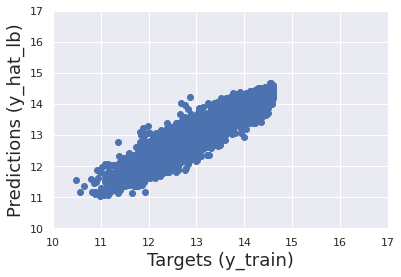

In [89]:
plt.scatter(y_train, y_hat_lb)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_lb)',size=18)


plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

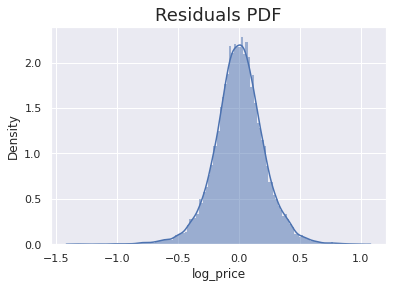

In [90]:
sns.histplot(y_train - y_hat_lb, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [91]:
r2 = r2_score (y_train, y_hat_lb)

print ('R-squared score', round (r2,2))

R-squared score 0.93


let's try the model on the test values now

In [92]:
y_hat_test_lb=lb.predict(x_test)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

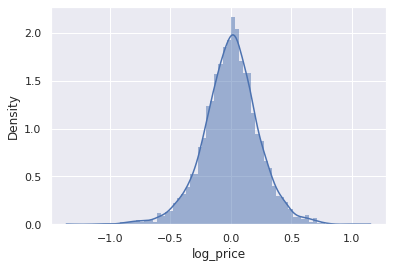

In [93]:
sns.histplot(y_test-y_hat_test_lb, kde=True, stat="density", linewidth=0)

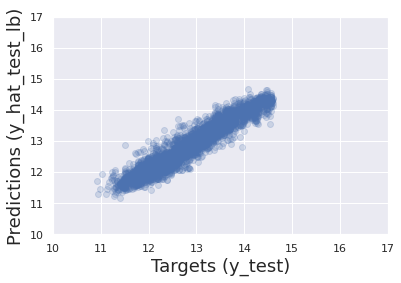

In [94]:
plt.scatter(y_test,y_hat_test_lb, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_lb)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

In [95]:
df_pf = pd.DataFrame(np.exp(y_hat_test_lb), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,629147.49,850000.00,220852.51,25.98
1,185783.74,99000.00,-86783.74,87.66
2,199086.65,199000.00,-86.65,0.04
3,130691.70,130000.00,-691.70,0.53
4,352999.46,395000.00,42000.54,10.63
...,...,...,...,...
4113,506797.33,414000.00,-92797.33,22.41
4114,212088.05,149000.00,-63088.05,42.34
4115,1005535.72,725000.00,-280535.72,38.69
4116,164949.94,159000.00,-5949.94,3.74


In [96]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4118.00,4118.00,4118.00,4118.00
mean,505896.13,520584.60,14688.47,18.13
std,411114.88,451160.18,155334.96,18.30
min,69287.02,55000.00,-1071619.13,0.00
25%,198262.47,194000.00,-38792.08,6.30
50%,348168.33,359000.00,1437.42,13.70
75%,682821.50,685000.00,54361.85,24.11
max,2371619.13,2190000.00,1311787.17,289.80


In [97]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
3879,385899.33,99000.00,-286899.33,289.80
2628,898916.11,300000.00,-598916.11,199.64
3914,636580.51,225000.00,-411580.51,182.92
2984,434793.91,160000.00,-274793.91,171.75
3279,151398.41,61000.00,-90398.41,148.19
...,...,...,...,...
2,199086.65,199000.00,-86.65,0.04
3418,130040.68,130000.00,-40.68,0.03
3054,179942.72,179999.00,56.28,0.03
3364,445133.86,445000.00,-133.86,0.03


In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_lb, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_lb, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_lb, y_test)))

r2_lb = r2_score (y_hat_test_lb, y_test)

print ('R-squared score', round (r2_lb,2))

Mean Absolute Error: 0.17581263131575178
Mean Squared Error: 0.054198405230949015
Root Mean Squared Error: 0.23280550945144965
R-squared score 0.91


# Model comparison

The linear OLS regression will not be considered further as it was obvious that both its graphs and metrics were much worse than the other techniques. The most likely reason is that the nature of the dataset is that there are many outliers and OLS has a very hard time dealing with outliers, leading to a high accumulated error and low R-squared value. 

Furthermore, graphs will not be shown either as they are too similar and will not provide value to the comparison.

In [99]:
from tabulate import tabulate

table = [["Mean Absolute Error", metrics.mean_absolute_error(y_hat_test_OLS, y_test),
          metrics.mean_absolute_error(y_hat_test_rf, y_test),
          metrics.mean_absolute_error(y_hat_test_cb, y_test),
          metrics.mean_absolute_error(y_hat_test_lb_def, y_test),
          metrics.mean_absolute_error(y_hat_test_lb, y_test)], 
         
        ["Mean Squared Error", metrics.mean_squared_error(y_hat_test_OLS,y_test),
        metrics.mean_squared_error(y_hat_test_rf, y_test),
        metrics.mean_squared_error(y_hat_test_cb, y_test),
        metrics.mean_squared_error(y_hat_test_lb_def, y_test),
        metrics.mean_squared_error(y_hat_test_lb, y_test)],
         
        ['Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_hat_test_OLS,y_test)),
        np.sqrt(metrics.mean_squared_error(y_hat_test_rf, y_test)),
        np.sqrt(metrics.mean_squared_error(y_hat_test_cb, y_test)),
        np.sqrt(metrics.mean_squared_error(y_hat_test_lb_def, y_test)),
        np.sqrt(metrics.mean_squared_error(y_hat_test_lb, y_test)) ],
         
        ['R-squared score', round(r2_OLS,3), round (r2_rf,3), round (r2_cb,3), round(r2_lb_def, 3),
         round (r2_lb,3)],
                  
        ['Execution time (seconds)', '-', round(diff_rf,2), round(diff_cb,2), round(diff_lb_def,2), 
         round(diff_lb,2)]]


print(tabulate(table, headers=["Parameter", "Lin.reg OLS", "RandomForest","Catboost","LGBM", "Tuned LGBM"], 
               numalign = "left"))

Parameter                 Lin.reg OLS          RandomForest    Catboost    LGBM       Tuned LGBM
------------------------  -------------------  --------------  ----------  ---------  ------------
Mean Absolute Error       0.2435289857989304   0.183333        0.177619    0.185546   0.175813
Mean Squared Error        0.1012714006526415   0.0670648       0.0543209   0.0599317  0.0541984
Root Mean Squared Error   0.31823167763854293  0.258969        0.233068    0.24481    0.232806
R-squared score           0.814                0.89            0.906       0.896      0.908
Execution time (seconds)  -                    22.26           4.08        0.43       38.85


Hyperparameter-tuned LGBM provides the best results in all metrics, with the minimal result in all 3 error metrics and the maximum result in R-squared score. It is noteable that RandomForest, Catboost and LGBM performed similarly and outperformed OLS significantly (~10% better R-squared score). This is likely due to the dataset containing numerous outliers, which OLS struggles with inherently.

In order to get the best possible predictive power out of the algorithms, hyperparameter tuning is necessary. This is a caveat due to the fact that it increases the time needed for computing, and the tuning itself is different for each dataset and the parameters have to be adjusted iteratively, until a satisfactory result is present. Hyperparameter tuning was only performed on LGBM, since it is the quickest algorithm in general and applying the tuning doesn't affect its speed significantly. To note is that all three algorithms performed well without tuning.

A separate script was run with hyperparameter tuning for RF and Catboost but the results were not significantly improved, while computing time increased exponentially.

In conclusion, the hyperparameter tuning in this project did not manage to significantly improve results and if training speed is desired, the default parameters set by each technique can be employed with a good amount of result accuracy. The Catboost regression model was able to correctly predict 91% of the real estate test dataset's price correctly, which is a significant improvement on the previous version of the project (82% R-squared). The inclusion of the location feature (in the dataset, 'subtitle' column) is attributed with this performance increase.